In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\sivak\OneDrive\Dokumen\DataSets\reviewsDF.csv", index_col=0)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568404 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   ReviewSummary           568379 non-null  object
 8   ReviewText              568437 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [4]:
df['ReviewText'].fillna(df['ReviewText'].mode()[0],inplace=True)

In [5]:
score = df["Score"].value_counts()
score

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

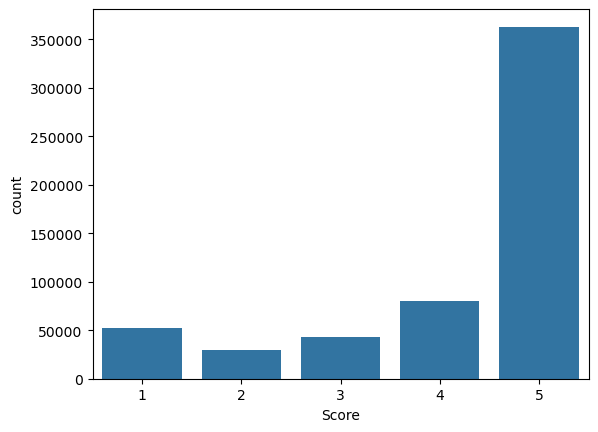

In [6]:
sns.countplot(x='Score',data=df)

In [7]:
def classify_review(rating):
    if rating >= 4:
        return "Positive"
    elif 2 <= rating < 4:
        return "Average"
    else:
        return "Negative"
    
df["Score"] = df["Score"].apply(classify_review)

Segregate the data into two parts:

In [8]:
X=df[['ReviewText']]
y = df["Score"]

Split the segregated data into 4 parts as X_train, X_test, y_train and y_test:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(454763, 1) (454763,)
(113691, 1) (113691,)


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sivak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Preprocessing on Train & Test data

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
stem = PorterStemmer()

In [13]:
lemma = WordNetLemmatizer()

In [14]:
def preprocess(data):
    
    sentence = re.sub("[^a-zA-Z]"," ",data)
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    sentence = [lemma.lemmatize(word) for word in sentence]
    sentence=  " ".join(sentence)
    return sentence

In [15]:
X_train= X_train['ReviewText'].apply(preprocess)

In [16]:
X_test = X_test['ReviewText'].apply(preprocess)

## Bag of words/CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [18]:
%time X_train_num = cv.fit_transform(X_train)

CPU times: total: 8.03 s
Wall time: 26.8 s


In [19]:
%time X_test_num = cv.transform(X_test)

CPU times: total: 2.33 s
Wall time: 5.54 s


## Building a model

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()

nb_model.fit(X_train_num,y_train)

MultinomialNB()

### Evaluation

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_train_pred = nb_model.predict(X_train_num)

In [23]:
train_score=accuracy_score(y_train,y_train_pred)
y_test_pred=nb_model.predict(X_test_num)
test_score=accuracy_score(y_test_pred,y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8361718081726086
Test Score: 0.8261691778592852


In [24]:
#confusion matrix
confusion_matrix(y_train, y_train_pred)

array([[ 29966,   7625,  20478],
       [  7922,  25996,   8024],
       [ 20303,  10151, 324298]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

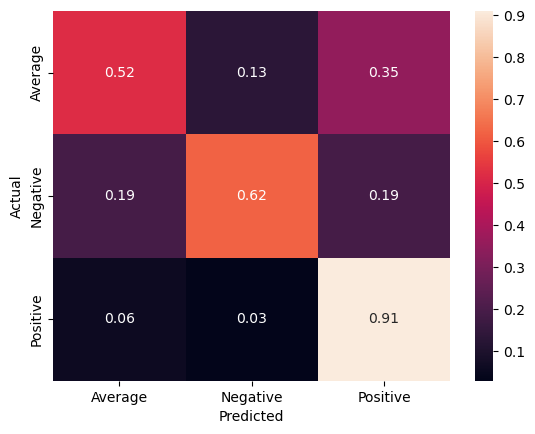

In [25]:
cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

- **True Positives (TP):** These are instances where the model correctly predicted the positive class. In your case, there are 0.62 (62%) true positives.
- **True Negatives (TN):** These are instances where the model correctly predicted the negative class. You have 0.52 (52%) true negatives.
- **False Positives (FP):** These are instances where the model predicted positive, but the actual class was negative. You’ve got 0.25 (25%) false positives.
- **False Negatives (FN):** These are instances where the model predicted negative, but the actual class was positive. There are 0.13 (13%) false negatives.

The heatmap visualization helps us quickly identify patterns. Darker colors indicate higher counts, which means more instances fall into that category. For instance, the high true positive count (0.62) is represented by a dark cell.

Text(0.5, 23.52222222222222, 'Predicted')

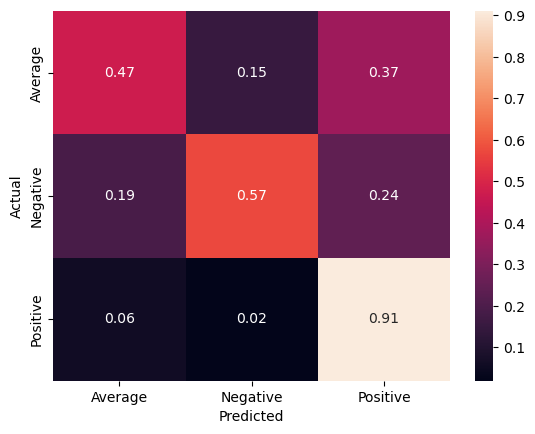

In [26]:
cm = confusion_matrix(y_test_pred,y_test)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')